<a href="https://colab.research.google.com/github/Ufuff/colab-ipynb/blob/main/Practice(mfcc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Основные задачи:

     Получить базовые знания в области машинного обучения;
     Получить навыки программирования на языке python;
     Поработать с библиотеками машинного обучения (sklearn, tensorflow);
     Применить алгоритмы машинного обучения на учебной задаче(Logistic Regression, Random Forest, Gradient Boosting, Neural Networks);
     Научиться подбирать гиперпараметры для моделей.
     Научиться извлекать фичи из аудиосигнала (mfcc).
     Ознакомиться с методами сэмплинга в условиях несбалансированности классов.
     Воспроизвести эффекты недообучения и переобучения.


2.Условие учебной задачи:

Написать классификатор произнесенных  цифр (0…9). После получения решения, добиться несбалансированности данных путем добавления 11-го класса с шумом. Рассмотреть возможные решения проблемы несбалансированности, повторить применение алгоритмов машинного обучения. Сравнить результаты.


3. Решение:


Набор входных данных состоит из 2000 аудиозаписей в формате wav на английскрм языке (по 200 на каждую цифру). Аудио конвертируем в mfcc с помощью библиотеки python_speech_features, далее обрезаем полученные наборы до 507 значений – близкий к медианному размер (если меньше 507, то заполняем нулями). Получаем данные для обучения и теста. Производим аналогичные действия с собственными записями (по 6 записей для каждого класса), добавляем 2-й тестовый набор данных.
Получаем несбалансированность классов. Восстановление баланса классов может проходить двумя путями. В первом случае удаляют некоторое количество примеров мажоритарного класса (undersampling), во втором – увеличивают количество примеров миноритарного (oversampling).
 Рассмотреть возможные решения проблемы несбалансированности, повторить применение алгоритмов машинного обучения.



### Preprocessing

In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5889 sha256=c8dac02e1d1edc21b602523f6f97330033060b26807904a402159a627cc7ec46
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy.fft
from scipy.io import wavfile
import numpy as np

from collections import Counter
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from skimage import color
from skimage import io
import pandas as pd
import os
from time import time
import matplotlib.pyplot as plt
%matplotlib inline 

from collections import Counter
from imblearn.under_sampling import TomekLinks, CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule
from imblearn.over_sampling import SMOTE  

import librosa
import scipy
import librosa.display
from IPython.display import Audio

import seaborn as sn
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
x_data = np.array([])
y_data = np.array([])

In [ ]:
def get_arr(file):
  (rate,sig) = wav.read(file)
  arr = np.array([])
  arr = mfcc(sig,rate)
  return arr

In [ ]:
dir = '/content/drive/My Drive/recordings/'
for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_data = np.append(y_data, int(f[0])) 
        
x_data = np.array([get_arr(dir+f) for f in filenames])

In [ ]:
filenames = filenames.clear

In [ ]:
x_data_n = np.array([])
y_data_n = np.array([])

In [ ]:
dir = '/content/drive/My Drive/noise/'
for roots, dirss, filenames in os.walk(dir):
    for f in filenames:
        y_data_n = np.append(y_data_n, 10) 
        
x_data_n = np.array([get_arr(dir+f) for f in filenames])

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [ ]:
filenames = filenames.clear

In [ ]:
print(x_data_n.shape)
print(y_data_n.shape)

(2469,)
(2469,)


In [ ]:
n = 0       
for i in range(2000):
  x_data[i] = x_data[i].reshape(x_data[i].size)
  n += x_data[i].size
n = n / 2000
print(n)

509.691


In [ ]:
for i in range(2459):
  x_data_n[i] = x_data_n[i].reshape(x_data_n[i].size)

In [ ]:
t_arr = np.zeros([13])

In [ ]:
for i in range(2000):
  if x_data[i].size < 507:
    while x_data[i].size < 507:
      x_data[i] = np.append(x_data[i], t_arr)
  else:
    x_data[i] = x_data[i][:507]

In [ ]:
x_data_n[1].size

6487

In [ ]:
i = 0
for i in range(2459):
  if x_data_n[i].size < 507:
    while x_data_n[i].size < 507:
      x_data_n[i] = np.append(x_data_n[i], t_arr)
  else: 
    x_data_n[i] = x_data_n[i][:507]

In [ ]:
print(x_data.shape)
print(x_data_n.shape)

(2000,)
(2469,)


In [ ]:
y_train = np.array([])
x_train = np.array([])
y_test = np.array([])
x_test = np.array([])

for i in range(2000):
  if i%10 != 0:
    x_train = np.append(x_train, x_data[i])
    y_train = np.append(y_train, y_data[i])
  else: 
    x_test = np.append(x_test, x_data[i])
    y_test = np.append(y_test, y_data[i])

for i in range(2459):
  if i%10 != 0:
    x_train = np.append(x_train, x_data_n[i])
    y_train = np.append(y_train, y_data_n[i])
  else: 
    x_test = np.append(x_test, x_data_n[i])
    y_test = np.append(y_test, y_data_n[i])
    
print(len(x_train))
print(y_train.size)
print(len(x_test))
print(y_test.size)

2034591
4013
226122
446


In [ ]:
x_train = x_train.reshape(4013, 507)
x_test = x_test.reshape(446, 507)

подготовка моих записей

11 класс - шум

In [ ]:
x_temp = np.array([])
y_my_test = np.array([])
x_my_test = np.array([])

dir = '/content/drive/My Drive/my_rec/'
for roots, dirss, filenames in os.walk(dir):
    for f in filenames:
        y_my_test = np.append(y_my_test, int(f[0])) 
        
i=1
for i in range(6):       
 y_my_test[i]+= 9
                              
x_temp = np.array([get_arr(dir+f) for f in filenames])
                              
print (y_my_test)
print (x_temp[0].shape)                             

[10. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  6.  5.  5.  5.  6.  6.  6.  6.  7.  8.  8.  7.  7.  7.  7.
  7.  6.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.]
(207, 13)


In [ ]:
for i in range(66):
  x_temp[i] = x_temp[i].reshape(x_temp[i].size)
  n += x_temp[i].size

i = 0
for i in range(66):
  if x_temp[i].size < 507:
    while x_temp[i].size < 507:
      x_temp[i] = np.append(x_temp[i], t_arr)
  else: 
    x_temp[i] = x_temp[i][:507]

for i in range(66):
  x_my_test = np.append(x_my_test, x_temp[i])

In [ ]:
x_my_test = x_my_test.reshape(66, 507)

### Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
clf.score(x_train, y_train)
predictions = clf.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro')) 
print(metrics.precision_score(y_test, predictions,average= 'macro')) 

predictions = clf.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)
print (str(y_my_test) + ' - my recordings')

0.8677130044843049
0.8487435328898744
0.8021427050478434
0.8636363636363636
[ 5. 10. 10. 10.  4. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  7.  5.  5.  5.  7.  6.  6.  2. 10.  8.  8.  7.  7.  7.  7.
 10.  8.  8.  9.  8.  9. 10.  8.  9.  9.  9.  9.]
[10. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  6.  5.  5.  5.  6.  6.  6.  6.  7.  8.  8.  7.  7.  7.  7.
  7.  6.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.] - my recordings


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=130, max_depth=10,
                             min_samples_leaf = 3, random_state=1)
random_forest.fit(x_train,y_train)
random_forest.score(x_train, y_train)
predictions = random_forest.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro'))
print(metrics.precision_score(y_test, predictions,average= 'macro'))

predictions = random_forest.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)

0.9708520179372198
0.940909090909091
0.9825732655502393
0.5606060606060606
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  4.  1.  0.  1.  1.  1.  1.
  2. 10.  2. 10.  2.  3.  2.  3.  3.  4.  3.  4.  4. 10.  3.  4. 10.  4.
 10.  5.  5.  2. 10.  5.  5.  7.  2.  7. 10. 10.  8.  8. 10. 10. 10. 10.
 10.  2.  8.  9.  8.  9.  8.  3. 10. 10. 10. 10.]


### Gradient Boosting

In [ ]:
g_boosting = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 150, min_child_weight = 3, subsample = 0.5)
g_boosting.fit(x_train,y_train)
g_boosting.score(x_train, y_train)
predictions = g_boosting.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro'))
print(metrics.precision_score(y_test, predictions,average= 'macro'))

predictions = g_boosting.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)

0.9798206278026906
0.9590909090909091
0.9711041477369949
0.6363636363636364
[10. 10. 10. 10. 10. 10. 10.  0. 10. 10. 10.  1.  1.  0.  1.  1.  1.  1.
  2. 10.  2.  2.  2.  3.  2.  3.  3. 10.  3.  4.  4.  3.  3.  1. 10.  1.
 10.  5.  5.  2.  5.  5.  5. 10. 10. 10. 10. 10.  8.  8. 10. 10. 10. 10.
 10.  1.  8.  9.  8.  9.  8.  3.  9. 10.  9.  9.]


### Undersampling

**Поиск связей Томека (Tomek Links)**


пример работы:

![alt text](https://basegroup.ru/sites/default/files/article_img/tomek_links.gif)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

tl = TomekLinks(sampling_strategy = 'majority')
x_res, y_res = tl.fit_resample(x_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({10.0: 2213, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180})
Resampled dataset shape Counter({10.0: 2213, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180})


мажоритарный класс не пересекается с другими классами, данный метод нам не подходит

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

tl = TomekLinks(sampling_strategy = 'all')
x_res, y_res = tl.fit_resample(x_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({10.0: 2213, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180})
Resampled dataset shape Counter({10.0: 2213, 5.0: 180, 7.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 4.0: 180, 6.0: 179, 8.0: 179, 2.0: 179, 3.0: 179})


исходя из результатов, делаем вывод, что набор данных не рассеян, хоть и имеется небольшая зашумленность

In [ ]:
print (str(y_my_test) + ' - my recordings')

[10. 10. 10. 10. 10. 10.  5.  5.  5.  6.  5.  5.  5.  4.  4.  4.  4.  3.
  3.  3.  4.  4.  3.  3.  3.  2.  2.  2.  1.  2.  2.  2.  1.  1.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  9.  9.  8.  9.  8.  9.  9.  9.  8.  8.  7.
  7.  8.  8.  7.  6.  7.  7.  7.  6.  6.  6.  6.] - my recordings


In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_res, y_res)
clf.score(x_res, y_res)
predictions = clf.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro'))
print(metrics.precision_score(y_test, predictions,average= 'macro'))

predictions = clf.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)

0.8587443946188341
0.8430894308943089
0.7934149730870813
0.8636363636363636
[10. 10.  4. 10. 10.  5.  5.  5.  5.  7.  5.  5.  5.  4.  4.  4.  4.  3.
  3.  3.  4.  4.  3.  3.  3.  2.  2.  2.  1.  2.  2.  2.  1.  1.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  9.  9. 10.  9.  8.  9.  9.  9.  8.  8.  7.
  7.  8.  8.  7.  8.  7. 10. 10.  2.  6.  6.  7.]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=130, max_depth=10,
                             min_samples_leaf = 3, random_state=1)
random_forest.fit(x_res,y_res)
random_forest.score(x_res, y_res)
predictions = random_forest.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro'))
print(metrics.precision_score(y_test, predictions,average= 'macro'))

predictions = random_forest.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)

0.9708520179372198
0.940909090909091
0.9825732655502393
0.5151515151515151
[10. 10. 10. 10. 10. 10. 10.  5.  5.  2.  5.  5. 10.  4. 10.  4.  4. 10.
  3.  3.  4.  4.  3.  3.  3.  2.  2. 10.  4. 10.  2.  2.  4.  1.  4.  1.
 10.  0. 10. 10. 10. 10. 10. 10. 10.  8. 10.  8. 10. 10.  9.  8.  8. 10.
 10.  8.  8. 10. 10. 10. 10. 10. 10.  7.  7.  7.]


In [ ]:
g_boosting = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 100, min_child_weight = 3)
g_boosting.fit(x_res, y_res)
g_boosting.score(x_res, y_res)
predictions = g_boosting.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro'))
print(metrics.precision_score(y_test, predictions,average= 'macro'))

predictions = g_boosting.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)

0.9618834080717489
0.9227272727272726
0.9580485531673841
0.5909090909090909
[10. 10. 10. 10. 10. 10.  5.  5.  5.  2.  5.  5. 10.  1. 10.  4.  4.  3.
  3.  3.  1. 10.  3.  3.  3.  2.  2. 10.  1.  2.  2. 10.  1.  1.  1.  1.
  1.  0.  0. 10. 10. 10. 10. 10. 10.  8.  9.  8.  9. 10.  9.  3.  8. 10.
 10. 10.  8. 10.  1. 10. 10. 10. 10.  6. 10.  7.]


**Правило сосредоточенного ближайшего соседа (Condensed Nearest Neighbor Rule)**

пример:

![alt text](https://basegroup.ru/sites/default/files/article_img/condensed_nearest_neighbor_rule.gif)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

cnn = CondensedNearestNeighbour(sampling_strategy = 'majority') 
x_res, y_res = cnn.fit_resample(x_train, y_train) 

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({10.0: 2213, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180})
Resampled dataset shape Counter({0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 10.0: 66})


In [ ]:
print('Original dataset shape %s' % Counter(y_train))

cnn = CondensedNearestNeighbour(sampling_strategy = 'all') 
x_res, y_res = cnn.fit_resample(x_train, y_train) 

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({10.0: 2213, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180})
Resampled dataset shape Counter({10.0: 73, 1.0: 15, 9.0: 15, 7.0: 9, 3.0: 6, 4.0: 6, 0.0: 5, 2.0: 4, 6.0: 4, 8.0: 4, 5.0: 1})


данный метод не подходит к нашим данным

**Односторонний сэмплинг (One-side sampling, one-sided selection)**

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

oss = OneSidedSelection('majority')
x_res, y_res = oss.fit_resample(x_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({10.0: 2213, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180})
Resampled dataset shape Counter({10.0: 978, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180})


**Правило «очищающего» соседа (neighborhood cleaning rule)**

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

ncr = NeighbourhoodCleaningRule('majority')
x_res, y_res = ncr.fit_resample(x_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({10.0: 2213, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180})
Resampled dataset shape Counter({10.0: 2207, 5.0: 180, 6.0: 180, 7.0: 180, 8.0: 180, 9.0: 180, 0.0: 180, 1.0: 180, 2.0: 180, 3.0: 180, 4.0: 180})


Вывод : методы undersampling'а для наших данных не подходят, сбалансировать классы не получилось

### Oversampling

Так как наш набор данных не рассеян, будем использовать SMOT, убрав перед этим зашумленность с помощью TomekLinks

Для рассеяных данных - ADASYN

In [ ]:
tl = TomekLinks(sampling_strategy = 'all')
x_t, y_t = tl.fit_resample(x_train, y_train)

In [ ]:
print('Original dataset shape %s' % sorted(Counter(y_train).items()))

x_res_overs, y_res_overs = SMOTE().fit_resample(x_t, y_t)

print('Resampled dataset shape %s' % sorted(Counter(y_res_overs).items()))


Original dataset shape [(0.0, 180), (1.0, 180), (2.0, 180), (3.0, 180), (4.0, 180), (5.0, 180), (6.0, 180), (7.0, 180), (8.0, 180), (9.0, 180), (10.0, 2213)]
Resampled dataset shape [(0.0, 2213), (1.0, 2213), (2.0, 2213), (3.0, 2213), (4.0, 2213), (5.0, 2213), (6.0, 2213), (7.0, 2213), (8.0, 2213), (9.0, 2213), (10.0, 2213)]


In [ ]:
print (str(y_my_test) + ' - my recordings')

[10. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  6.  5.  5.  5.  6.  6.  6.  6.  7.  8.  8.  7.  7.  7.  7.
  7.  6.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.] - my recordings


In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_res_overs, y_res_overs)
clf.score(x_res_overs, y_res_overs)
predictions = clf.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro'))
print(metrics.precision_score(y_test, predictions,average= 'macro'))

predictions = clf.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)

0.8878923766816144
0.8938285291943828
0.8229647679729261
0.8939393939393939
[ 5. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  7.  5.  5.  5. 10.  6.  6.  2. 10.  8.  8.  7.  7.  7.  7.
 10.  8.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=130, max_depth=10,
                             min_samples_leaf = 1, random_state=1)
random_forest.fit(x_res_overs,y_res_overs)
random_forest.score(x_res_overs, y_res_overs)
predictions = random_forest.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro'))
print(metrics.precision_score(y_test, predictions,average= 'macro'))

predictions = random_forest.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)

0.984304932735426
0.968181818181818
0.9804608728831937
0.6666666666666666
[10. 10. 10. 10. 10. 10.  5.  5.  5.  3.  5.  5. 10.  4. 10.  4.  4.  3.
  3.  3.  4.  4.  3.  3.  3.  2. 10. 10.  4. 10. 10. 10.  1.  1.  4.  1.
  1.  0.  0.  0.  0. 10.  0.  9.  9.  8.  9.  8.  9.  9.  9.  8.  8. 10.
 10.  8.  8. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [ ]:
g_boosting = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 150, min_child_weight = 3, subsample = 0.5)
g_boosting.fit(x_res_overs, y_res_overs)
g_boosting.score(x_res_overs, y_res_overs)
predictions = g_boosting.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions,average= 'macro'))
print(metrics.precision_score(y_test, predictions,average= 'macro'))

predictions = g_boosting.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions))
print(predictions)

0.984304932735426
0.9681818181818183
0.9731135159364825
0.6515151515151515
[10. 10. 10. 10. 10. 10.  5.  5.  5.  3.  5.  5. 10.  1. 10.  4.  4.  3.
  3.  3.  4.  4.  3.  3.  3.  2.  2. 10.  1.  2.  2.  0.  1.  1.  4.  1.
  1.  0.  0.  0. 10. 10. 10.  9.  9.  8.  9.  8.  9. 10.  9.  3.  8. 10.
 10.  8.  8. 10.  1. 10. 10. 10. 10.  1.  1.  3.]


Вывод : последовательное использование методов TomekLink и SMOTE позволило нам сбалансировать классы, результаты улучшились на всех 3-х моделях

### Augmentation

Examples:

In [ ]:
zero = '/content/drive/My Drive/recordings/0_jackson_0.wav' 
t_voice = zero
Audio(t_voice)

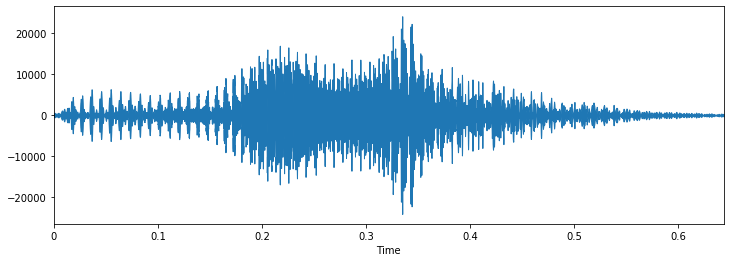

In [ ]:
sample_rate, samples = scipy.io.wavfile.read(t_voice)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples.astype('float'), sr=sample_rate)
plt.show()

Change pitch and speed

resample length_change =  1.1


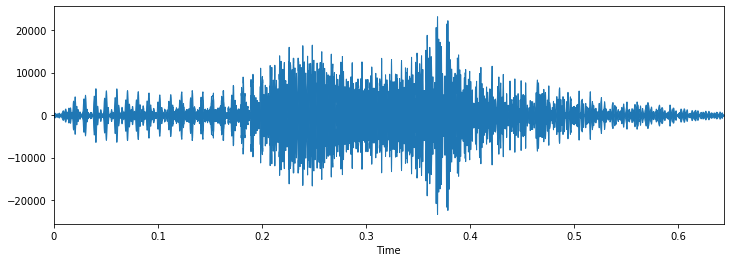

In [ ]:
y_pitch_speed = samples.copy()
length_change = np.random.uniform(low=1.1, high = 1.1)
speed_fac = 1.0  / length_change
print("resample length_change = ",length_change)
tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
y_pitch_speed *= 0
y_pitch_speed[0:minlen] = tmp[0:minlen]

plt.figure(figsize=(12, 4))
librosa.display.waveplot(y_pitch_speed.astype('float'), sr=sample_rate)
plt.show()

Audio(y_pitch_speed, rate=sample_rate)

resample length_change =  0.9


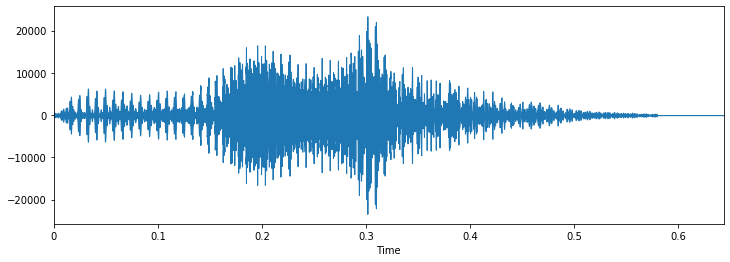

In [ ]:
y_pitch_speed = samples.copy()
length_change = np.random.uniform(low=0.9, high = 0.9)
speed_fac = 1.0  / length_change
print("resample length_change = ",length_change)
tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
y_pitch_speed *= 0
y_pitch_speed[0:minlen] = tmp[0:minlen]

plt.figure(figsize=(12, 4))
librosa.display.waveplot(y_pitch_speed.astype('float'), sr=sample_rate)
plt.show()

Audio(y_pitch_speed, rate=sample_rate)

Add noise

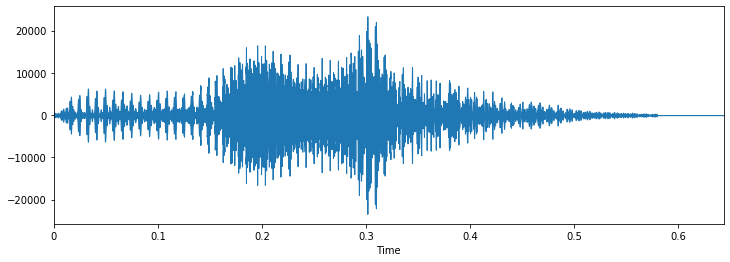

In [ ]:
y_noise = samples.copy()
noise_amp = 0.01*np.random.uniform()*np.amax(y_noise) #0.5-0.005
y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])

plt.figure(figsize=(12, 4))
librosa.display.waveplot(y_pitch_speed.astype('float'), sr=sample_rate)
plt.show()

Audio(y_noise, rate=sample_rate)

Streching

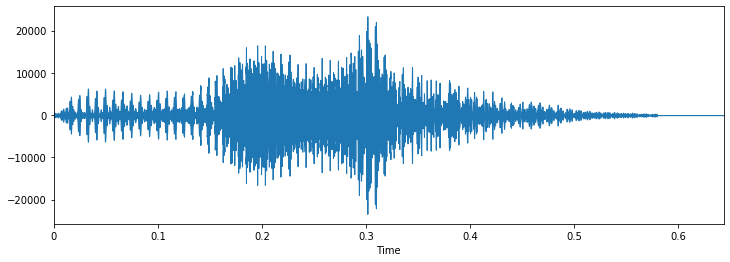

In [ ]:
input_length = len(samples)
streching = samples.copy()
streching = librosa.effects.time_stretch(streching.astype('float'), 0.7) #0.7-0.9
if len(streching) > input_length:
    streching = streching[:input_length]
else:
    streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")

plt.figure(figsize=(12, 4))
librosa.display.waveplot(y_pitch_speed.astype('float'), sr=sample_rate)
plt.show()

Audio(streching, rate=sample_rate)

#########################

In [ ]:
def get_aug_streching(file, strech):
  dir_voice = file 
  t_voice = dir_voice
  sample_rate, samples = scipy.io.wavfile.read(t_voice)
  
  input_length = len(samples)
  streching = samples.copy()
  streching = librosa.effects.time_stretch(streching.astype('float'), strech)#0.6-0.9
  if len(streching) > input_length:
     streching = streching[:input_length]
  else:
     streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")

  arr = np.array([])
  arr = mfcc(streching,sample_rate)
  return arr

In [ ]:
def get_aug_noise(file, x):
  dir_voice = file 
  t_voice = dir_voice
  sample_rate, samples = scipy.io.wavfile.read(t_voice)
  
  y_noise = samples.copy()
  noise_amp = x*np.random.uniform()*np.amax(y_noise) #0.5-0.005
  y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])

  arr = np.array([])
  arr = mfcc(y_noise,sample_rate)
  return arr

In [ ]:
def get_aug_pitch_speed(file, low, high):
  dir_voice = file 
  t_voice = dir_voice
  sample_rate, samples = scipy.io.wavfile.read(t_voice)
  
  y_pitch_speed = samples.copy()
  length_change = np.random.uniform(low, high)   #(low=0.8, high = 0.8)
  speed_fac = 1.0  / length_change
  tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
  minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
  y_pitch_speed *= 0
  y_pitch_speed[0:minlen] = tmp[0:minlen]

  arr = np.array([])
  arr = mfcc(y_pitch_speed,sample_rate)
  return arr

In [ ]:
filenames = filenames.clear

In [ ]:
x_aug_temp = np.array([])
x_aug_data = np.array([])
y_aug_data = np.array([])
dir = '/content/drive/My Drive/recordings/'


for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_streching(dir+f, 0.8) for f in filenames]])
x_aug_data = x_aug_temp.copy()

x_aug_data.shape

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_noise(dir+f, 0.005) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_noise(dir+f, 0.05) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_noise(dir+f, 0.5) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_pitch_speed(dir+f,0.9, 0.9) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_pitch_speed(dir+f,0.95, 0.95) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_pitch_speed(dir+f,0.8, 0.8) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_pitch_speed(dir+f,0.85, 0.85) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_pitch_speed(dir+f,0.92, 0.92) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_pitch_speed(dir+f,0.87, 0.87) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_pitch_speed(dir+f,1.1, 1.1) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

for root, dirs, filenames in os.walk(dir):
    for f in filenames:
        y_aug_data = np.append(y_aug_data, int(f[0])) 
x_aug_temp = np.array([[get_aug_pitch_speed(dir+f,0.9, 1.1) for f in filenames]])
x_aug_data = np.vstack((x_aug_data, x_aug_temp))

In [ ]:
print(y_aug_data.shape)
print(x_aug_data.size)

(24000,)
24000


In [ ]:
for i in range(12):
 for j in range(2000):
    x_aug_data[i][j] = x_aug_data[i][j].reshape(x_aug_data[i][j].size)

for i in range(12):
 for j in range(2000):
   if x_aug_data[i][j].size < 507:
     while x_aug_data[i][j].size < 507:
       x_aug_data[i][j] = np.append(x_aug_data[i][j], t_arr)
   else: 
     x_aug_data[i][j] = x_aug_data[i][j][:507]

for i in range(12):
 for j in range(2000):
   if j%10 != 0:
     x_train = np.append(x_train, x_aug_data[i][j])
     y_train = np.append(y_train, y_aug_data[j])
   else: 
     x_test = np.append(x_test, x_aug_data[i][j])
     y_test = np.append(y_test, y_aug_data[j])
    
print(len(x_train))
print(y_train.size)
print(len(x_test))
print(y_test.size)

12985791
25613
1442922
2846


In [ ]:
print(x_train.size/507)
print(y_train.size)
print(x_test.size/507)
print(y_test.size)

25613.0
25613
2846.0
2846


In [ ]:
x_train = x_train.reshape(25613, 507)
x_test = x_test.reshape(2846, 507)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

tl = TomekLinks(sampling_strategy = 'all')
x_res, y_res = tl.fit_resample(x_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({5.0: 2340, 6.0: 2340, 7.0: 2340, 8.0: 2340, 9.0: 2340, 0.0: 2340, 1.0: 2340, 2.0: 2340, 3.0: 2340, 4.0: 2340, 10.0: 2213})
Resampled dataset shape Counter({9.0: 2338, 5.0: 2337, 0.0: 2337, 7.0: 2334, 1.0: 2333, 2.0: 2330, 3.0: 2330, 4.0: 2330, 8.0: 2329, 6.0: 2326, 10.0: 2213})


In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
clf.score(x_train, y_train)
predictions1 = clf.predict(x_test)
print(metrics.accuracy_score(y_test, predictions1))
print(metrics.recall_score(y_test, predictions1,average= 'macro'))
print(metrics.precision_score(y_test, predictions1,average= 'macro')) 

predictions1_1 = clf.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions1_1))
print(predictions1_1)
print (str(y_my_test) + ' - my recordings')



#Результаты без аугментации:
#0.8677130044843049
#0.8487435328898744
#0.8021427050478434
#0.8636363636363636

0.8745607870695713
0.8739410995508556
0.8746745152677051
0.7121212121212122
[10.  4.  5. 10. 10.  4.  0.  0.  0. 10. 10.  1.  1.  0.  1.  1.  1.  9.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  1.  3.  3.  4.  4.  4.
  4.  9.  5.  2.  5.  5.  9. 10. 10.  5. 10. 10.  8.  8.  7.  7.  7.  7.
 10. 10.  8.  9.  8.  9.  8.  3.  9.  9.  9.  9.]
[10. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  6.  5.  5.  5.  6.  6.  6.  6.  7.  8.  8.  7.  7.  7.  7.
  7.  6.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.] - my recordings


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0.5, 1, 'Confusion Matrix')

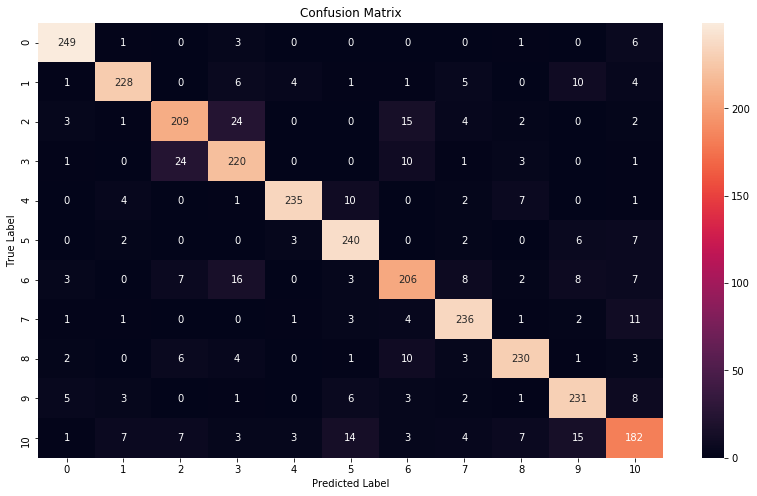

In [ ]:
matrix = confusion_matrix(y_test, predictions1)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

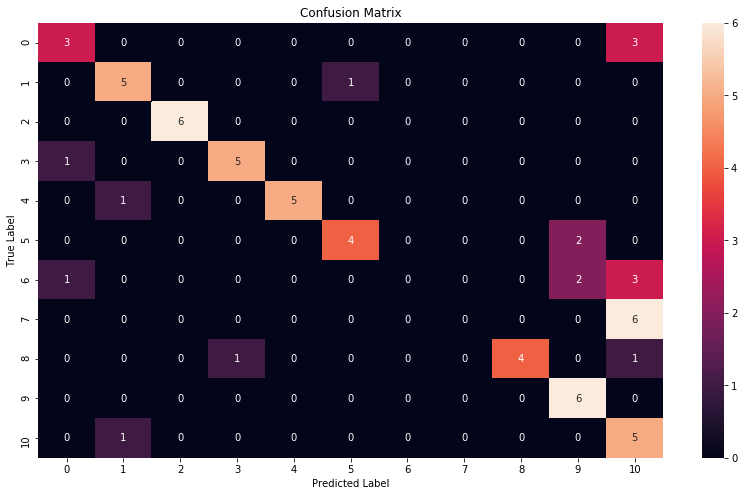

In [ ]:
matrix = confusion_matrix(y_my_test, predictions1_1)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
clf_res = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_res, y_res)
clf_res.score(x_res, y_res)
predictions2_1 = clf_res.predict(x_test)
print(metrics.accuracy_score(y_test, predictions2_1))
print(metrics.recall_score(y_test, predictions2_1,average= 'macro')) #способность обнаруживать класс
print(metrics.precision_score(y_test, predictions2_1,average= 'macro')) #способность отличать класс от других классов

predictions2_3 = clf_res.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions2_3))
print(predictions2_3)
print (str(y_my_test) + ' - my recordings')

0.8713984539704849
0.8707942464040024
0.8712148153475474
0.6515151515151515
[10.  1. 10. 10. 10. 10.  0.  0. 10. 10. 10.  1.  1.  0.  1.  1.  1.  9.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  1.  3.  0.  4.  4.  4.
  5.  9.  5.  0.  5.  5.  9.  9. 10.  9. 10. 10.  8.  8. 10. 10. 10. 10.
 10. 10.  8.  9.  8.  9. 10.  3.  9.  9.  9.  9.]
[10. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  6.  5.  5.  5.  6.  6.  6.  6.  7.  8.  8.  7.  7.  7.  7.
  7.  6.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.] - my recordings


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0.5, 1, 'Confusion Matrix')

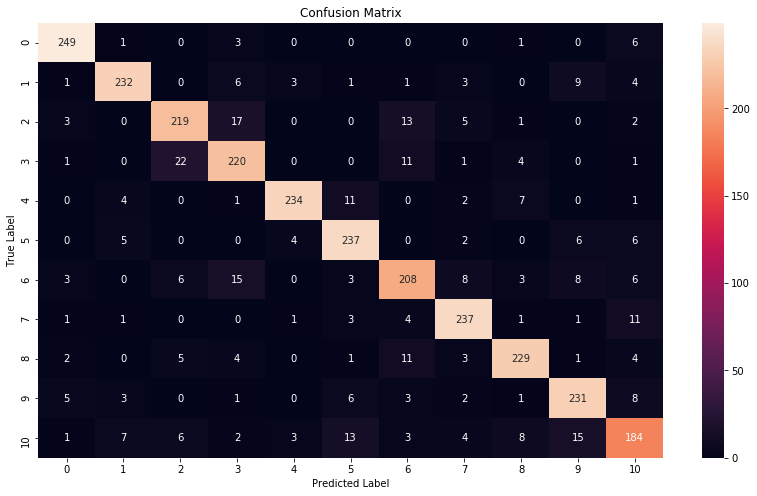

In [ ]:
matrix = confusion_matrix(y_test, predictions2_1)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

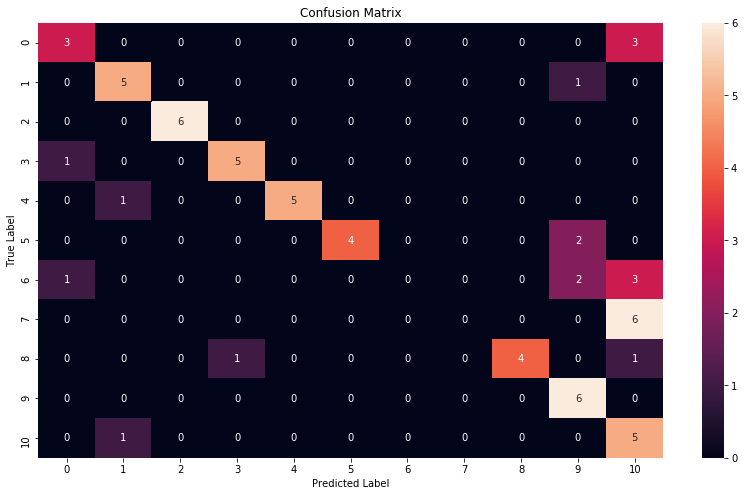

In [ ]:
matrix = confusion_matrix(y_my_test, predictions2_3)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
random_forest = RandomForestClassifier(n_estimators=130, max_depth=10,
                             min_samples_leaf = 3, random_state=1)
random_forest.fit(x_train,y_train)
random_forest.score(x_train, y_train)
predictions3 = random_forest.predict(x_test)
print(metrics.accuracy_score(y_test, predictions3))
print(metrics.recall_score(y_test, predictions3,average= 'macro'))
print(metrics.precision_score(y_test, predictions3,average= 'macro'))

predictions3_1 = random_forest.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions3_1))
print(predictions3_1)
print (str(y_my_test) + ' - my recordings')

#Результаты без аугментации:
#0.9708520179372198
#0.940909090909091
#0.9825732655502393
#0.5606060606060606

0.9191848208011244
0.9193416339757803
0.9238265880738171
0.7272727272727273
[10.  5. 10. 10. 10. 10.  0.  0.  0.  0. 10.  4.  1.  0.  1.  1.  1.  4.
  2. 10.  2.  2. 10.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
 10.  5.  5.  3.  5.  5.  5.  7.  3.  9.  3.  5.  8.  8. 10. 10. 10. 10.
  7.  3.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.]
[10. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  6.  5.  5.  5.  6.  6.  6.  6.  7.  8.  8.  7.  7.  7.  7.
  7.  6.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.] - my recordings


Text(0.5, 1, 'Confusion Matrix')

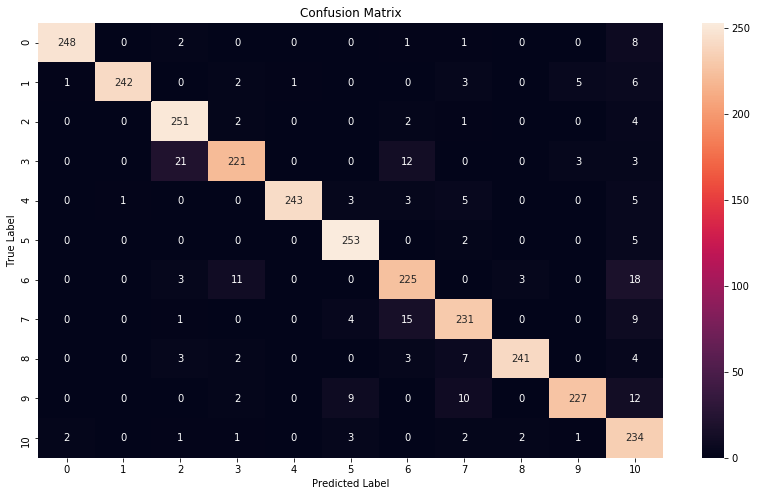

In [ ]:
matrix = confusion_matrix(y_test, predictions3)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

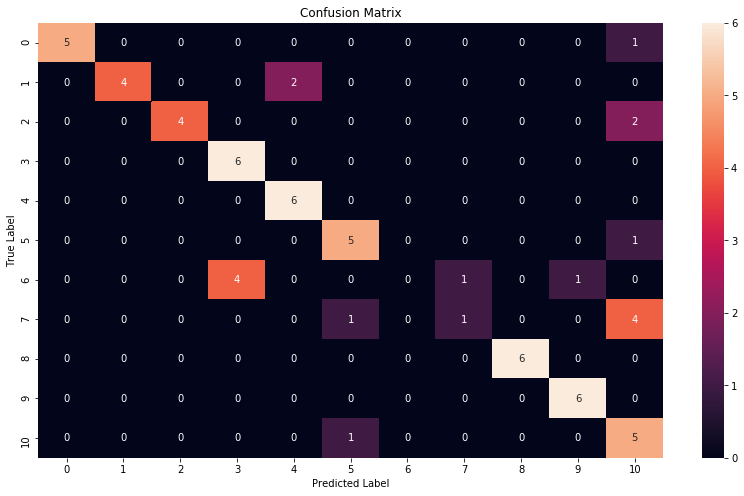

In [ ]:
matrix = confusion_matrix(y_my_test, predictions3_1)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
random_forest_res = RandomForestClassifier(n_estimators=130, max_depth=10,
                             min_samples_leaf = 3, random_state=1)
random_forest_res.fit(x_res,y_res)
random_forest_res.score(x_res, y_res)
predictions4 = random_forest_res.predict(x_test)
print(metrics.accuracy_score(y_test, predictions4))
print(metrics.recall_score(y_test, predictions4,average= 'macro'))
print(metrics.precision_score(y_test, predictions4,average= 'macro'))

predictions4_1 = random_forest_res.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions4_1))
print(predictions4_1)
print (str(y_my_test) + ' - my recordings')

0.9142656359803233
0.914366933879129
0.9185915678884633
0.7272727272727273
[10.  5. 10. 10. 10. 10.  0.  0.  0.  0. 10.  4.  1.  0.  1.  1.  1.  4.
  2. 10.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
 10.  5.  5.  3.  5.  5.  5.  9.  9.  9.  3. 10.  8.  8. 10. 10. 10. 10.
 10.  3.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.]
[10. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  6.  5.  5.  5.  6.  6.  6.  6.  7.  8.  8.  7.  7.  7.  7.
  7.  6.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.] - my recordings


Text(0.5, 1, 'Confusion Matrix')

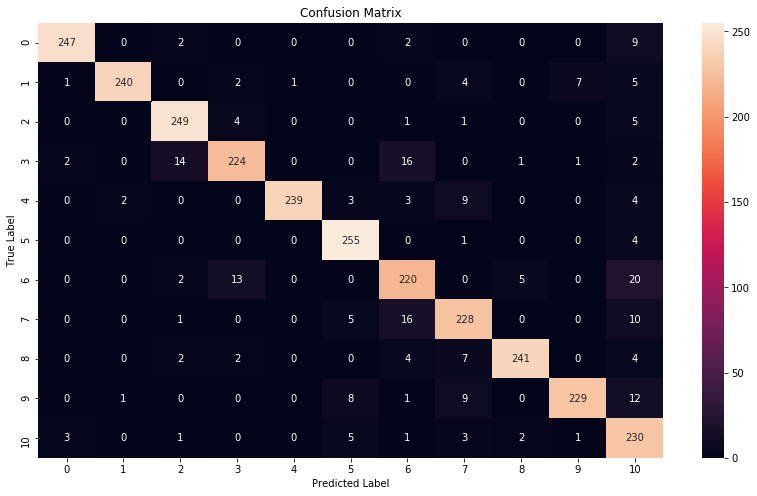

In [ ]:
matrix = confusion_matrix(y_test, predictions4)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

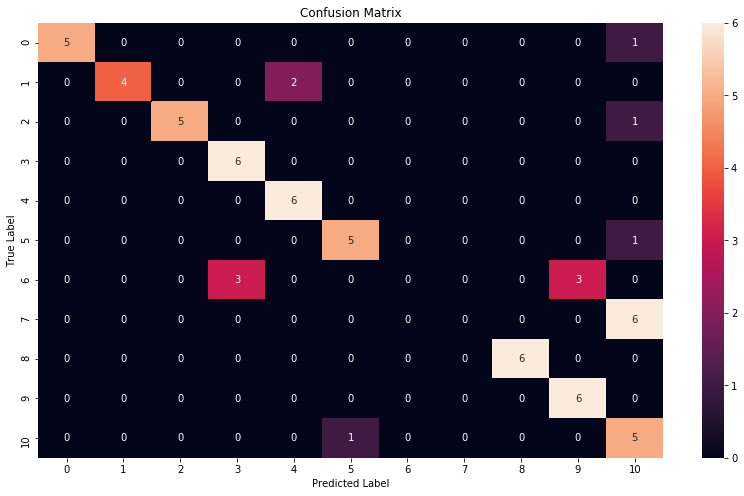

In [ ]:
matrix = confusion_matrix(y_my_test, predictions4_1)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

при использовании агмунтации и TomekLinks результат в random forest и logRegression на тестовых данных стал немного больше по сравнению с несбалансированными данными. Мои аудио стали распознаваться лучше на всех 3-х моделях

In [ ]:
g_boosting = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 150, min_child_weight = 3, subsample = 0.5)
g_boosting.fit(x_train,y_train)
g_boosting.score(x_train, y_train)
predictions5 = g_boosting.predict(x_test)
print(metrics.accuracy_score(y_test, predictions5))
print(metrics.recall_score(y_test, predictions5,average= 'macro'))
print(metrics.precision_score(y_test, predictions5,average= 'macro'))

predictions5_1 = g_boosting.predict(x_my_test)
print(metrics.accuracy_score(y_my_test, predictions5_1))
print(predictions5_1)
print (str(y_my_test) + ' - my recordings')

#Результаты без аугментации:
#0.9798206278026906
#0.9590909090909091
#0.9711041477369949
#0.6363636363636364

0.9638088545326774
0.9638268235829209
0.9639713556899216
0.7424242424242424
[10. 10. 10. 10. 10. 10.  0.  0.  0. 10. 10.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  1.  3.  4.  4.  3.  3.  4. 10.  4.
 10.  5.  5.  3.  5.  5.  5.  2.  9.  9.  3. 10.  8.  8. 10. 10. 10. 10.
 10.  9.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.]
[10. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  3.  2.  3.  3.  4.  3.  4.  4.  3.  3.  4.  4.  4.
  5.  5.  5.  6.  5.  5.  5.  6.  6.  6.  6.  7.  8.  8.  7.  7.  7.  7.
  7.  6.  8.  9.  8.  9.  8.  8.  9.  9.  9.  9.] - my recordings


Text(0.5, 1, 'Confusion Matrix')

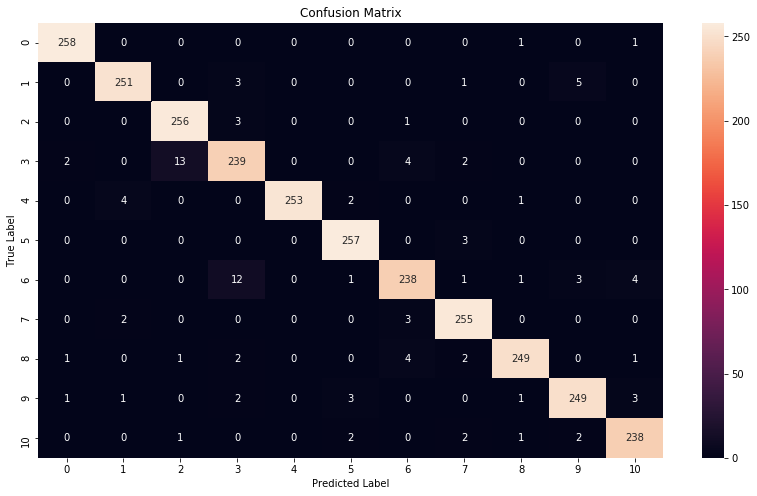

In [ ]:
matrix = confusion_matrix(y_test, predictions5)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

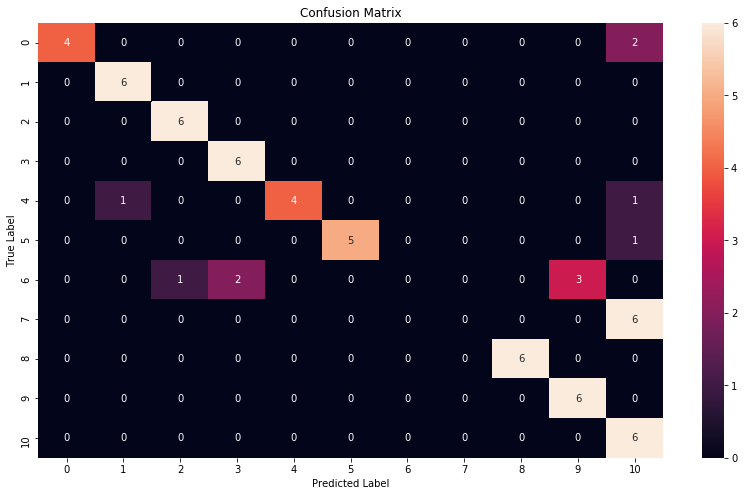

In [ ]:
matrix = confusion_matrix(y_my_test, predictions5_1)
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

### Neural Networks(overfitting)

In [ ]:
!pip install keras_metrics

In [ ]:
from time import time
import keras
import keras_metrics
from keras import metrics
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras import utils
from tensorflow.keras import metrics
import tensorflow as tf
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
y_train = utils.to_categorical(y_train)
print(y_train[3])
y_test = utils.to_categorical(y_test)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
y_my_test = utils.to_categorical(y_my_test)

In [ ]:
model = Sequential()

model.add(Dense(800,input_dim=507, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(11, activation='softmax'))

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)


In [ ]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 800)               406400    
_________________________________________________________________
dense_51 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 11)                363       
Total params: 519,627
Trainable params: 519,627
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 100

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,Y_train, batch_size=batch_size, 
                    epochs=100,
                    validation_data=(X_val, Y_val),
                    verbose=1,
                    )

Train on 23051 samples, validate on 2562 samples
Epoch 1/100
23051/23051 [==============================] - 1s 45us/sample - loss: 0.4935 - acc: 0.8612 - val_loss: 0.1679 - val_acc: 0.9454
Epoch 2/100
23051/23051 [==============================] - 1s 33us/sample - loss: 0.1178 - acc: 0.9619 - val_loss: 0.1160 - val_acc: 0.9629
Epoch 3/100
23051/23051 [==============================] - 1s 33us/sample - loss: 0.0700 - acc: 0.9768 - val_loss: 0.1370 - val_acc: 0.9563
Epoch 4/100
23051/23051 [==============================] - 1s 34us/sample - loss: 0.0613 - acc: 0.9793 - val_loss: 0.1272 - val_acc: 0.9621
Epoch 5/100
23051/23051 [==============================] - 1s 33us/sample - loss: 0.0541 - acc: 0.9820 - val_loss: 0.1289 - val_acc: 0.9614
Epoch 6/100
23051/23051 [==============================] - 1s 34us/sample - loss: 0.0572 - acc: 0.9814 - val_loss: 0.0995 - val_acc: 0.9719
Epoch 7/100
23051/23051 [==============================] - 1s 34us/sample - loss: 0.0435 - acc: 0.9864 - val_lo

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

2846/2846 [==============================] - 0s 59us/sample - loss: 0.2022 - acc: 0.9758


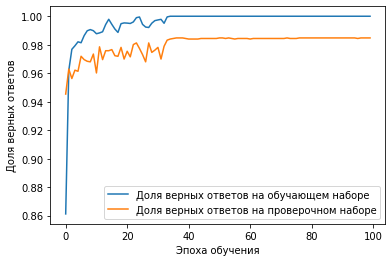

In [ ]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Neural Networks(underfitting)

In [ ]:
model = Sequential()

model.add(Dense(30,input_dim=507, activation='relu'))
model.add(Dense(11,input_dim=50, activation='softmax'))

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)


In [ ]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                15240     
_________________________________________________________________
dense_34 (Dense)             (None, 11)                341       
Total params: 15,581
Trainable params: 15,581
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 50

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,Y_train, batch_size=batch_size, 
                    epochs=10,
                    validation_data=(X_val, Y_val),
                    verbose=1,
                    )

Train on 23051 samples, validate on 2562 samples
Epoch 1/10
23051/23051 [==============================] - 2s 89us/sample - loss: 1.8997 - acc: 0.6355 - val_loss: 0.7128 - val_acc: 0.7888
Epoch 2/10
23051/23051 [==============================] - 2s 74us/sample - loss: 0.4854 - acc: 0.8483 - val_loss: 0.4397 - val_acc: 0.8622
Epoch 3/10
23051/23051 [==============================] - 2s 73us/sample - loss: 0.3193 - acc: 0.8964 - val_loss: 0.3281 - val_acc: 0.8911
Epoch 4/10
23051/23051 [==============================] - 2s 72us/sample - loss: 0.2357 - acc: 0.9245 - val_loss: 0.2820 - val_acc: 0.9145
Epoch 5/10
23051/23051 [==============================] - 2s 71us/sample - loss: 0.1894 - acc: 0.9352 - val_loss: 0.2827 - val_acc: 0.9188
Epoch 6/10
23051/23051 [==============================] - 2s 72us/sample - loss: 0.1662 - acc: 0.9440 - val_loss: 0.2553 - val_acc: 0.9227
Epoch 7/10
23051/23051 [==============================] - 2s 73us/sample - loss: 0.1451 - acc: 0.9514 - val_loss: 0.2

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

2846/2846 [==============================] - 0s 85us/sample - loss: 0.3394 - acc: 0.9171


In [ ]:
scores = model.evaluate(x_my_test, y_my_test, verbose=1)

66/66 [==============================] - 0s 331us/sample - loss: 11.0862 - acc: 0.3182


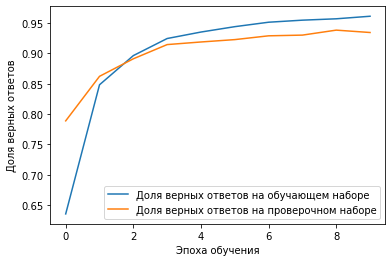

In [ ]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Neural Networks

**Обучение на несбалансированной выборке**

In [ ]:
model = Sequential()

model.add(Dense(100,input_dim=507, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200, activation='relu'))
model.add(Dense(11, activation='softmax'))

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)


In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               50800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 11)                2211      
Total params: 73,211
Trainable params: 73,211
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
сheckpoint = ModelCheckpoint('digit_rec.h5', 
                              monitor='val_acc', 
                              save_best_only=True,
                              verbose=1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
batch_size = 50

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,Y_train, batch_size=batch_size, 
                    epochs=15,
                    validation_data=(X_val, Y_val),
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction]
                    )

Train on 3611 samples, validate on 402 samples
Epoch 1/15
3400/3611 [===========================>..] - ETA: 0s - loss: 2.0924 - acc: 0.7356
Epoch 00001: val_acc improved from -inf to 0.91294, saving model to digit_rec.h5
3611/3611 [==============================] - 0s 109us/sample - loss: 2.0009 - acc: 0.7411 - val_loss: 0.3157 - val_acc: 0.9129
Epoch 2/15
3500/3611 [============================>.] - ETA: 0s - loss: 0.3129 - acc: 0.9134
Epoch 00002: val_acc improved from 0.91294 to 0.93781, saving model to digit_rec.h5
3611/3611 [==============================] - 0s 55us/sample - loss: 0.3159 - acc: 0.9136 - val_loss: 0.2294 - val_acc: 0.9378
Epoch 3/15
2500/3611 [===================>..........] - ETA: 0s - loss: 0.2218 - acc: 0.9328
Epoch 00003: val_acc improved from 0.93781 to 0.95274, saving model to digit_rec.h5
3611/3611 [==============================] - 0s 51us/sample - loss: 0.2137 - acc: 0.9360 - val_loss: 0.1715 - val_acc: 0.9527
Epoch 4/15
3450/3611 [========================

In [ ]:
model.load_weights('digit_rec.h5')

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

446/446 [==============================] - 0s 56us/sample - loss: 0.0506 - acc: 0.9865


Text(0.5, 1, 'Confusion Matrix')

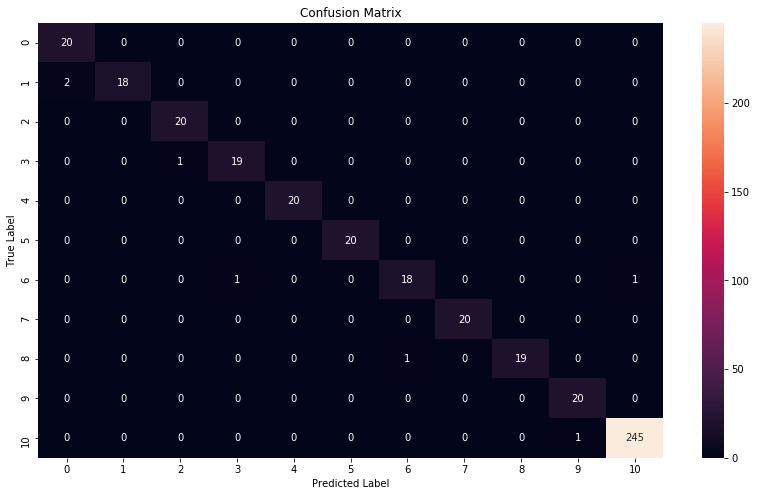

In [ ]:
predictions = model.predict(x_test)
y_predict = (predictions > 0.5)
matrix = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
scores = model.evaluate(x_my_test, y_my_test, verbose=1)

66/66 [==============================] - 0s 137us/sample - loss: 8.3524 - acc: 0.4545


Text(0.5, 1, 'Confusion Matrix')

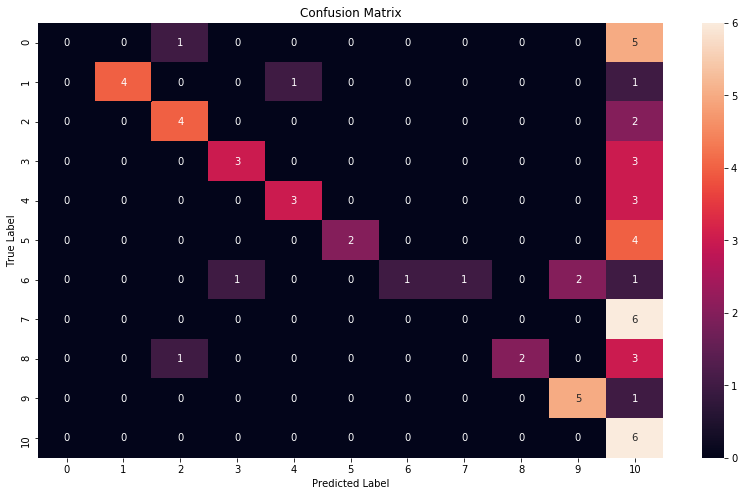

In [ ]:
predictions = model.predict(x_my_test)
y_predict = (predictions > 0.5)
matrix = confusion_matrix(y_my_test.argmax(axis=1), y_predict.argmax(axis=1))
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

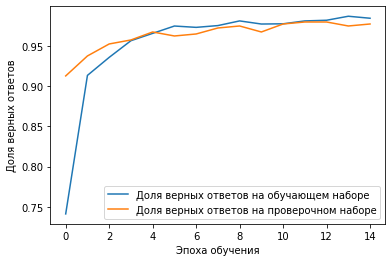

In [ ]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Обучение на сбалансированной выборке (с использованием аугментации)**

In [ ]:
model2 = Sequential()

model2.add(Dense(100,input_dim=507, activation='relu'))
#model2.add(Dropout(0.25))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(11, activation='softmax'))

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

print(model2.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 100)               50800     
_________________________________________________________________
dense_90 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_91 (Dense)             (None, 11)                2211      
Total params: 73,211
Trainable params: 73,211
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
сheckpoint = ModelCheckpoint('digit_rec.h5', 
                              monitor='val_acc', 
                              save_best_only=True,
                              verbose=1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, #количество эпох, после которых происходит изменение скорости обучения
                                            verbose=1, 
                                            factor=0.5, #значение, на которое умножается скорость обучения, пока не дойдем до min_lr
                                            min_lr=0.00001) 

In [ ]:
batch_size = 50

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model2.fit(X_train,Y_train, batch_size=batch_size, 
                    epochs=15,
                    validation_data=(X_val, Y_val),
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction]
                    )

Train on 23051 samples, validate on 2562 samples
Epoch 1/15
22750/23051 [============================>.] - ETA: 0s - loss: 0.7123 - acc: 0.8410
Epoch 00001: val_acc improved from -inf to 0.92233, saving model to digit_rec.h5
23051/23051 [==============================] - 4s 156us/sample - loss: 0.7059 - acc: 0.8421 - val_loss: 0.2459 - val_acc: 0.9223
Epoch 2/15
22900/23051 [============================>.] - ETA: 0s - loss: 0.1601 - acc: 0.9490
Epoch 00002: val_acc improved from 0.92233 to 0.93482, saving model to digit_rec.h5
23051/23051 [==============================] - 1s 60us/sample - loss: 0.1606 - acc: 0.9488 - val_loss: 0.2124 - val_acc: 0.9348
Epoch 3/15
22600/23051 [============================>.] - ETA: 0s - loss: 0.1305 - acc: 0.9594
Epoch 00003: val_acc improved from 0.93482 to 0.95004, saving model to digit_rec.h5
23051/23051 [==============================] - 1s 58us/sample - loss: 0.1302 - acc: 0.9596 - val_loss: 0.1835 - val_acc: 0.9500
Epoch 4/15
22950/23051 [========

In [ ]:
model2.load_weights('digit_rec.h5')

In [ ]:
scores = model2.evaluate(x_test, y_test, verbose=1)

2846/2846 [==============================] - 0s 66us/sample - loss: 0.1158 - acc: 0.9758


Text(0.5, 1, 'Confusion Matrix')

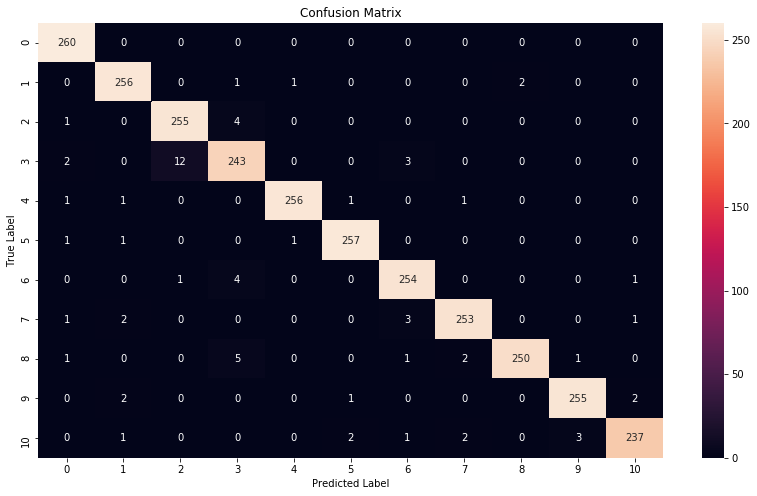

In [ ]:
predictions = model2.predict(x_test)
y_predict = (predictions > 0.5)
matrix = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
scores = model2.evaluate(x_my_test, y_my_test, verbose=1)

66/66 [==============================] - 0s 153us/sample - loss: 11.5758 - acc: 0.5000


Text(0.5, 1, 'Confusion Matrix')

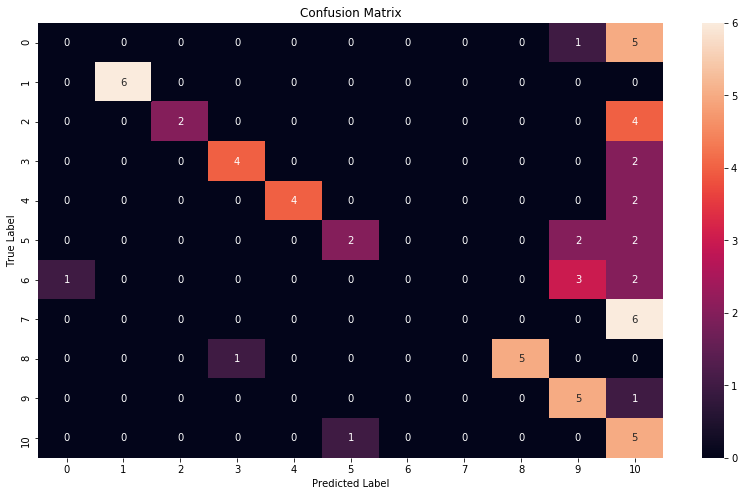

In [ ]:
predictions = model2.predict(x_my_test)
y_predict = (predictions > 0.5)
matrix = confusion_matrix(y_my_test.argmax(axis=1), y_predict.argmax(axis=1))
plt.figure(figsize = (14,8))
sn.heatmap(matrix,annot=True,cbar=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

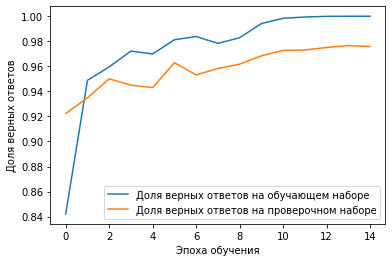

In [ ]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Результаты, полученные на тесте из исходного набора данных лучше, чем на других использованных моделях, однако на моих записях результат хуже.